<font color=gray size=5><b>載入套件</b></font>

In [1]:
import pandas as pd
import os
import numpy as np
from collections import Counter #統計詞頻
#--------------------
#NLP用
from gensim import corpora, models
import jieba.posseg as jp, jieba 
import jieba.analyse 
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER #中研院語料庫

<font color=gray size=5><b> 載入語料庫</b></font>

In [2]:
ws = WS(r"C:\Users\rex51\OneDrive\桌面\data")
pos = POS(r"C:\Users\rex51\OneDrive\桌面\data")
# ner = NER(r"C:\Users\rex51\OneDrive\桌面\data")

<font color=gray size=5><b> 資料前處理</b></font>

In [41]:
df = pd.read_excel(r'C:\Users\rex51\OneDrive\桌面\test.xlsx') # 載入文檔資料

In [42]:
df.isna().sum()

Unnamed: 0          0
Create Time         0
Message             0
Caption             0
post_impressions    0
post_raech          0
post clicks         0
CTR                 0
排行榜_懶人包             0
親子                  0
旅遊                  0
結婚                  0
喜餅                  0
懷孕                  0
生產                  0
月子                  0
醫療                  0
教學                  0
實測                  0
品牌名                 0
寶寶用品                0
寶寶食品                0
寶寶身體/症狀             0
派對                  0
小孩                  0
孕婦飲食                0
孕婦餵奶                0
孕婦症狀                0
保養                  0
瘦身                  0
孕婦/媽媽用品             0
網紅明星                0
居家用品                0
收納                  0
教育                  0
性愛                  0
感情                  0
婆媳                  0
年份                  0
族群                  0
形容詞                 0
12星座                0
主題數                 0
dtype: int64

In [43]:
df.head()

,Unnamed: 0,Create Time,Message,Caption,post_impressions,post_raech,post clicks,CTR,排行榜_懶人包,親子,...,收納,教育,性愛,感情,婆媳,年份,族群,形容詞,12星座,主題數
0,0,01/20/2020 17:13:54,日本「寶可夢嬰兒用品」，讓寶貝直接化身真人皮卡丘～可愛鼠你！👉http://bit.ly/2...,吼！老闆，杯子空了啦～再來一杯啦！,5,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,02/28/2020 21:12:01,小孩無聊時就給他這個👉http://bit.ly/381cNtx\n-\n來波波媽咪兒IG看...,最新更新！一分鐘帶你速速看完台北木柵動物園現況～還有超可愛的水豚君！,1505,1446,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,01/01/2020 08:03:00,元旦第一篇就先給大家這個好康資訊！春節想要去東京或京都的人，趕快預訂一波啦！！\n\n#大人...,【波波快訊】日本超狂推出「寶可夢主題房」，超大卡比獸＆驚喜小禮，快來收服吧！,585,571,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,01/05/2020 08:24:00,中獎的人，理直氣壯分享這篇給你的隊友，請他包辦假日的所有家事吧😘\n\n#找藉口很方便的那種文,就是懶癌末期！這5個星座「假日秒變會呼吸的肉肉」，第一名竟然是...？,312,299,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,02/24/2020 07:44:35,韓國IG超爆笑「搞怪弟」讓你笑到嫑嫑～👉http://bit.ly/2ubgq1A\n-\n...,小子～告訴你趴妹不是這麼容易的啦！😎,1243,1223,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df = df.dropna(subset=['Caption']).reset_index()

In [173]:
df['title_length'] = df.Caption.apply(lambda x :len(x))

In [174]:
df = df.loc[df['title_length'] > 10].reset_index()

In [45]:
df 

,index,Unnamed: 0,Create Time,Message,Caption,post_impressions,post_raech,post clicks,CTR,排行榜_懶人包,...,收納,教育,性愛,感情,婆媳,年份,族群,形容詞,12星座,主題數
0,0,0,01/20/2020 17:13:54,日本「寶可夢嬰兒用品」，讓寶貝直接化身真人皮卡丘～可愛鼠你！👉http://bit.ly/2...,吼！老闆，杯子空了啦～再來一杯啦！,5,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,02/28/2020 21:12:01,小孩無聊時就給他這個👉http://bit.ly/381cNtx\n-\n來波波媽咪兒IG看...,最新更新！一分鐘帶你速速看完台北木柵動物園現況～還有超可愛的水豚君！,1505,1446,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,01/01/2020 08:03:00,元旦第一篇就先給大家這個好康資訊！春節想要去東京或京都的人，趕快預訂一波啦！！\n\n#大人...,【波波快訊】日本超狂推出「寶可夢主題房」，超大卡比獸＆驚喜小禮，快來收服吧！,585,571,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,01/05/2020 08:24:00,中獎的人，理直氣壯分享這篇給你的隊友，請他包辦假日的所有家事吧😘\n\n#找藉口很方便的那種文,就是懶癌末期！這5個星座「假日秒變會呼吸的肉肉」，第一名竟然是...？,312,299,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,8,02/24/2020 07:44:35,韓國IG超爆笑「搞怪弟」讓你笑到嫑嫑～👉http://bit.ly/2ubgq1A\n-\n...,小子～告訴你趴妹不是這麼容易的啦！😎,1243,1223,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,9,04/20/2020 22:22:00,枕頭的多種玩法👉https://bit.ly/3b6FWFF\n-\n來自前世情人最浪漫的作...,來自前世情人最浪漫的作弊💕,2669,2385,2,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,10,04/01/2020 21:12:00,甘願被爸爸玩的萌娃👉🏻https://bit.ly/2y5ETXK\n-\n今天愚人節，還是...,今天愚人節，還是傻傻被騙到的me🙄,1842,1507,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,11,01/03/2020 08:09:00,住在新竹附近的你，怎麼可以錯過這波期間限定的燈節！\n\n快來波波媽咪兒IG一起講悄悄話👉🏻...,【期間限定】巨型大白兔現身城市中！新竹「城市躲貓貓」燈節超萌登場,540,534,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,12,04/13/2020 21:03:25,當媽媽之後常碰到的崩潰日常之一呢😂\n\n媽咪兒IG也有媽媽金句喔👉🏻http://bit....,【媽媽超崩潰事件】關於寶寶吃飯這件事...,139,123,3,2,0,...,0,0,0,0,0,0,0,0,0,0
9,9,14,01/12/2020 06:04:00,人生勝利組公式：猛男老爸+天使寶寶+療癒寵物❤\n\n#為什麼這種組合都在別人家,薩摩耶犬＋健身猛男一家人，天使與魔鬼組合，畫面太美好彷彿置身天堂！,574,571,3,0,0,...,0,0,0,0,0,0,0,0,0,0


<font color=gray size=5><b> 載入自訂義辭典</b></font>

In [4]:
# 用讀CSV的方式讀取前面匯出的txt
path_CIS_dict = r'C:\Users\rex51\OneDrive\桌面\Dict_GSDM.txt'
df_ner_dict = pd.read_csv(path_CIS_dict, sep="\n", header=None)
# 存到list
df_ner_dict.columns = ['NER']
list_ner_dict = list(df_ner_dict['NER'])
# 將list轉成dict型態，這邊每個權重都設為1
dict_for_CKIP = dict((el,1) for el in list_ner_dict)
dict_for_CKIP = construct_dictionary(dict_for_CKIP)

<font color=gray size=5><b> 載入禁用辭典</b></font>

In [5]:
with open(r'C:\Users\rex51\OneDrive\桌面\stopWords.txt', encoding = 'UTF-8') as f: #載入使用者自定義禁用詞
    stopWords = [line.strip() for line in f.readlines()]


<font color=gray size=5><b> 斷詞斷句，並使用dict_for_CKIP字典</b></font>

In [46]:
word_s = ws(df.Caption, coerce_dictionary = dict_for_CKIP)
word_p = pos(word_s)

In [7]:
flags = ['Na','VC','A','VE','Nb','VA','Nf','Nc','VH','FW'] # 選擇需要的詞性以利排除不必要的詞彙

In [8]:
#詞性檢查
for i in range(len(df.Caption)):
    for w, p in zip(word_s[i],word_p[i]):
            print(w,p)

你 Nh
真的 D
夠 Dfa
了解 VK
自己 Nh
嗎 T
？ QUESTIONCATEGORY
透過 P
幾 Neu
個 Nf
問題 Na
， COMMACATEGORY
認識 VJ
潛意識 Na
中 Ng
真正 A
的 DE
自己 Nh
吧 T
！ EXCLAMATIONCATEGORY
女孩 Na
必 D
看 VC
！ EXCLAMATIONCATEGORY
網友 Na
分享 VJ
25 Neu
個 Nf
變美 VH
的 DE
技巧 Na
， COMMACATEGORY
一起 D
讓 VL
自己 Nh
更 Dfa
進步 VH
！ EXCLAMATIONCATEGORY
嫌 VK
臉 Na
上 Ncd
的 DE
痣 Na
佔位 VA
又 D
礙眼 VH
？ QUESTIONCATEGORY
來 D
看看 VC
『 PARENTHESISCATEGORY
痣 Na
的 DE
代表 VC
位置 Na
』 PARENTHESISCATEGORY
， COMMACATEGORY
小心 VK
別 D
除掉 VC
妳 Nh
的 DE
好運 VH
痣 Na
啊 T
！ EXCLAMATIONCATEGORY
狠下心 VL
買 VC
了 Di
絕對 D
會 D
謝天謝地 VH
！ EXCLAMATIONCATEGORY
生活 Na
中 Ng
一定 D
會 D
用到 VC
的 DE
美妝 Na
小 VH
物 Na
， COMMACATEGORY
錢 Na
就 D
是 SHI
要 D
花 VC
在 P
刀口 Na
上 Ncd
啊 T
！ EXCLAMATIONCATEGORY
大頭貼 Na
是 SHI
該 D
換 VC
了 Di
！ EXCLAMATIONCATEGORY
教 VC
你 Nh
『 PARENTHESISCATEGORY
1235 Neu
數字 Na
系列 Na
』 PARENTHESISCATEGORY
姿勢 Na
， COMMACATEGORY
成為 VG
最 Dfa
young FW
元氣 Na
少女 Na
！ EXCLAMATIONCATEGORY
臉 Na
馬上 D
變小 VHC
2 Neu
個 Nf
尺寸 Na
！ EXCLAMATIONCATEGORY
從 P
「 PARENTHESISCATEGORY
下巴 Na
形狀 Na
」 PARENTHES

會 D
後悔 VL
！ EXCLAMATIONCATEGORY
10 Neu
件 Nf
女孩 Na
都 D
應該 D
嘗試 VF
的 DE
To do list FW
， COMMACATEGORY
妳 Nh
已經 D
完成 VC
幾 Neu
項 Nf
了 T
？ QUESTIONCATEGORY
現 D
省 Nc
近 Nes
$ FW
4000 Neu
！ EXCLAMATIONCATEGORY
小 VH
棕瓶 Na
首度 D
「 PARENTHESISCATEGORY
買 VC
一 Neu
送 VD
一 Neu
」 PARENTHESISCATEGORY
來 VA
啦 T
， COMMACATEGORY
想 VE
入手 VA
要 D
囤貨 VA
的 DE
只 Da
有 V_2
這 Nep
天 Nf
了 T
！ EXCLAMATIONCATEGORY
我 Nh
要 D
代替 VC
月亮 Na
懲罰 VC
你 Nh
！ EXCLAMATIONCATEGORY
『 PARENTHESISCATEGORY
Colourpop FW
 x  FW
美 VH
少女 Na
戰士 Na
』 PARENTHESISCATEGORY
， COMMACATEGORY
夢幻 Na
閃亮 VH
組合 VC
超 Dfa
可愛 VH
！ EXCLAMATIONCATEGORY
擦 VC
的 DE
、 PAUSECATEGORY
吃 VC
的 DE
都 D
做 VC
了 Di
， COMMACATEGORY
怎樣 D
就 D
是 SHI
白不了 VH
！ EXCLAMATIONCATEGORY
原來 D
這 Nep
三 Neu
個 Nf
壞 VHC
習慣 Na
就 D
是 SHI
罪魁禍首 Na
！ EXCLAMATIONCATEGORY
看起來 D
超 Dfa
認真 VH
打扮 VC
！ EXCLAMATIONCATEGORY
簡易 VH
＃ FW
約會 VB
髮型 Na
小 VH
技巧 Na
， COMMACATEGORY
這 Nep
兩 Neu
天 Nf
就 D
讓 VL
髮型 Na
走 VA
個 Nf
優雅 VH
復古風 Na
吧 T
！ EXCLAMATIONCATEGORY
人間 Nc
最 Dfa
強美 VH
少女 Na
！ EXCLAMATIONCATEGORY
橋本環奈 Nb


在 D
用 VC
！ EXCLAMATIONCATEGORY
自製 VC
電影 Na
字幕 Na
、 PAUSECATEGORY
訊息 Na
對話框 Na
靠 P
一 Neu
個 Nf
修 VC
圖 Na
APP FW
就 D
搞定 VC
！ EXCLAMATIONCATEGORY
過年 VA
準備 VF
賺 VC
一 Neu
波 Nf
！ EXCLAMATIONCATEGORY
『 PARENTHESISCATEGORY
30 Neu
  WHITESPACE
個 Nf
開運 Nd
招財 VA
小 VH
祕技 Na
』 PARENTHESISCATEGORY
無論 Cbb
是 SHI
不 D
是 SHI
迷信 VK
我 Nh
都 D
要 D
試 VF
了 Di
是 SHI
不 D
是 SHI
覺得 VK
我 Nh
眼睛 Na
特別 VH
亮 VH
？ QUESTIONCATEGORY
必備 A
＃ FW
蜜桃 Na
裸 VH
隱眼 VH
， COMMACATEGORY
連 Cbb
妝容 Na
都 D
一起 D
變 VG
可愛 VH
啦 T
！ EXCLAMATIONCATEGORY
超 VJ
療癒 VC
拿 VC
鐵色系 Na
小 VH
磚塊 Na
！ EXCLAMATIONCATEGORY
整 Neqa
系列 Na
都 D
超 Dfa
溫柔 VH
， COMMACATEGORY
知性 Na
優雅 VH
都 D
是 SHI
你 Nh
！ EXCLAMATIONCATEGORY
宋智孝 Nb
坦言 VE
代謝 VH
變慢 VH
， COMMACATEGORY
減重 VA
7 Neu
kg Nf
靠 P
這 Nep
2 Neu
招 Nf
！ EXCLAMATIONCATEGORY
維持 VJ
完美 VH
曲線 Na
超 Dfa
簡單 VH
～ FW
有沒有 D
在 P
尊重 VJ
！ EXCLAMATIONCATEGORY
韓網 Na
瘋傳 VE
超爆笑 Na
「 PARENTHESISCATEGORY
夫妻 Na
合照 VA
修圖法 Na
」 PARENTHESISCATEGORY
， COMMACATEGORY
請 VF
成為 VG
藝術 Na
的 DE
犧牲品 Na
吧 T
！ EXCLAMATIONCATEGORY
吸睛度 Na
超高 VH
！ EXCLAMA

遠征隊 Na
」 PARENTHESISCATEGORY
限定團 Na
， COMMACATEGORY
强勢 Na
歐膩 VH
來 VA
了 Di
！ EXCLAMATIONCATEGORY
別 D
只 Da
用 P
第一 Neu
眼 Nf
判斷 VE
！ EXCLAMATIONCATEGORY
伸手 VA
看 VC
「 PARENTHESISCATEGORY
潛在 A
個性 Na
」 PARENTHESISCATEGORY
， COMMACATEGORY
你 Nh
是 SHI
反差 Na
大 VH
的 DE
人 Na
嗎 T
～ FW
「 PARENTHESISCATEGORY
20 Neu
歲 Nf
喝醉 VA
是 SHI
可愛 VH
， COMMACATEGORY
40 Neu
歲 Nf
喝醉 VA
是 SHI
可憐 VHC
」 PARENTHESISCATEGORY
輕熟 VH
女 Na
必 D
看 VC
影集 Na
Top FW
10 Neu
， COMMACATEGORY
獻給 VD
在 P
年紀 Na
中 Ng
迷惘 VH
的 DE
女孩 Na
們 Na
！ EXCLAMATIONCATEGORY
眨眼 VA
瞬間 Nd
就 D
把 P
人 Na
勾走 VC
！ EXCLAMATIONCATEGORY
又 Caa
閃 VC
又 Caa
服貼 VH
的 DE
小 VH
光點 Na
， COMMACATEGORY
軟 VH
Ｑ FW
果凍 Na
一 D
抹 Nf
就 D
超閃 VH
！ EXCLAMATIONCATEGORY
青春期 Na
懷舊 VH
書單 Na
！ EXCLAMATIONCATEGORY
九 Neu
把 Nf
刀 Na
、 PAUSECATEGORY
橘子 Na
、 PAUSECATEGORY
藤井樹 Nb
. PERIODCATEGORY
. PERIODCATEGORY
. PERIODCATEGORY
那些 Neqa
年 Nf
在 P
桌子 Na
下 Ncd
偷看 VC
的 DE
小說 Na
， COMMACATEGORY
你 Nh
看 VC
過 Di
哪些 Neqa
？ QUESTIONCATEGORY
「 PARENTHESISCATEGORY
棒棒堂 Nb
開堂 VA
！ EXCLAMATIONCATEGORY
吼吼吼 VA


In [47]:
#將每一篇文章斷完詞後整理為一個list再加入所有文章的結果list以利後續文字主題模型應用
words_ls = []
for i in range(len(df.Caption)):
    temp_ls = []
    for w, p in zip(word_s[i],word_p[i]):
        if p in flags and w not in stopWords:
            temp_ls.append(w)
            print(w,p)
    words_ls.append(temp_ls)

吼 VA
老闆 Na
杯子 Na
杯 Nf
更新 VC
分鐘 Nf
速速 VH
看完 VC
台北 Nc
木柵 Nc
動物園 Nc
現況 Na
可愛 VH
水豚君 Na
快訊 Na
日本 Nc
超狂 VH
推出 VC
寶可夢 Na
主題房 Nc
超大 A
卡 Na
獸 Na
驚喜 VH
禮 Na
收服 VC
懶 VH
癌 Na
星座 Na
秒 Nf
變 VH
呼吸 VC
肉肉 Na
名 Nf
小子 Na
告訴 VE
趴 VA
妹 Na
容易 VH
😎 FW
前世 Na
情人 Na
浪漫 VH
作弊 VA
💕 FW
傻傻 VH
me🙄 FW
期間 Na
巨型 Na
白兔 Na
現身 VA
城市 Na
新竹 Nc
城市 Nc
躲 VC
貓貓 Na
超萌 VH
登場 VA
崩潰 VH
事件 Na
吃飯 VA
件 Nf
事 Na
薩摩耶犬 Na
健身 VA
猛男 Na
一家人 Na
天使 Na
魔鬼 Na
組合 Na
畫面 Na
美好 VH
天堂 Nc
現成 A
迷唇姊 Na
抓 VC
💋 FW
天然 A
ㄟ FW
睫毛 Na
小子 Na
告訴 VE
趴 VA
妹 Na
容易 VH
😎 FW
羊咩咩 Nb
吃 VC
飼料 Na
吃 VC
～～ FW
速度 Na
驚人 VH
迷你 VH
蛙人 Na
ni FW
女人 Na
人生 Na
階段 Na
鞋子 Na
故事 Na
爆笑 VA
老爸 Na
神 Na
同步 VH
表情 Na
🤣🤣 FW
COSTCO FW
巨型 Na
雪寶 Na
麋鹿 Na
小斯 Na
元 Nf
冰雪奇緣 Nb
衝 VA
家 Nc
Cookie Monster FW
上線😎 VA
把握 VC
繡球 Na
尾巴 Na
人潮 Na
澎湖 Nc
衝 VA
波 Nf
家 Nc
Cookie Monster FW
上線😎 VA
吃 VC
草莓 Na
人生 Na
喜怒哀樂 Na
🍓 FW
把握 VC
繡球 Na
尾巴 Na
人潮 Na
澎湖 Nc
小琉球 Nc
陽明山 Nc
拍好 VC
拍滿 VC
有樣學樣 VA
回 Nf
事 Na
孩 Na
狗 Na
可愛 VH
😍 FW
長大 VH
珍貴 VH
夥伴 Na
😍 Na
世界 Nc
可愛 VH
西瓜 Na
盛產 VC
～～😍 FW
超實用 VH
🤣 FW
鞋子 Na
掉 VH
繩子 Na
新竹 Nc
動物園 Nc
華麗 V

可愛 VH
吃 VC
😝 FW
氣勢 Na
強壓 VC
日本 Nc
準備 VC
幸福 VH
手作 Na
便當 Na
吃 VC
外食 VA
心情 Na
海波浪 Na
封 Nf
信 Na
件 Nf
事 Na
罪惡感 Na
完美 VH
幼幼 Nb
班迪士尼 Nb
公主 Na
報到 VA
睡 VA
過頭 VH
小可愛 Na
敲碗 VA
出席 VC
心花怒放 VH
時尚 Na
滿月 VH
禮物 Na
ZARA HOME FW
類 Nf
育嬰 VA
用品 Na
蘿莉 Nb
酷 VH
渡邊直美 Nb
追蹤 VC
日本 Nc
爆紅 VH
娃模 Na
帥 VH
血槽 Na
直接 VH
清空 VH
日本 Nc
搞 VC
極限 Na
療癒 VC
時刻 Na
親生 VH
生 VC
雙胞胎 Na
搞定好 VC
方便 VH
張 Nf
照片 Na
曝 VC
愛 Na
熱淚盈眶 VH
繪本 Na
告訴 VE
面對 VC
死亡 VH
OO FW
製造機 Na
看完 VC
爆笑 VA
漫畫 Na
女人 Na
爆萌 VC
Q比美 Nb
乃滋 VH
嬰兒服 Na
擠 VH
體重 Na
直接 VH
容量 Na
隊友 Na
以為 VE
睡 VA
開 VC
聲音📣 Na
正確 VH
開箱 VA
方式 Na
爸 Na
媽 Na
學 VC
講話 VA
聰明 VH
錦囊 Na
開口 VA
遜掉 VC
超萌 VH
姐妹 Na
圓 VH
亮 VH
點星 Na
可愛 VH
生 VC
完美 VH
幸福 VH
幸福 VH
蔡康永 Nb
女人 Na
名言 Na
Top8 FW
厭世 VH
陪伴 VC
夢 Na
古人 Na
養兒 VA
語錄 Na
拍 VC
桌 Na
安可 VH
禮物 Na
座 Nf
豪宅 Na
Kylie Jenner FW
刷新 VC
普羅 VH
觀 VC
拜託 VC
回去 VA
上班 VA
職場 Nc
狀況題 Na
求 VC
溫層 Na
崩潰 VH
高 VH
圓圓 VH
產 VC
走 VA
鐘 Na
身材 Na
件 Nf
事 Na
重要 VH
審美 A
日本 Nc
搞 VC
極限 Na
療癒 VC
時刻 Na
親生 VH
氣勢 Na
強壓 VC
日本 Nc
準備 VC
幸福 VH
手作 Na
便當 Na
吃 VC
外食 VA
拜託 VC
回去 VA
上班 VA
職場 Nc
狀況題 Na
求 VC
溫層 Na


In [48]:
#檢查斷詞結果
for i,w in enumerate(words_ls):
    print(df.Caption[i])
    print(i,w)
    print('\n') 

吼！老闆，杯子空了啦～再來一杯啦！
0 ['吼', '老闆', '杯子', '杯']


最新更新！一分鐘帶你速速看完台北木柵動物園現況～還有超可愛的水豚君！
1 ['更新', '分鐘', '速速', '看完', '台北', '木柵', '動物園', '現況', '可愛', '水豚君']


【波波快訊】日本超狂推出「寶可夢主題房」，超大卡比獸＆驚喜小禮，快來收服吧！
2 ['快訊', '日本', '超狂', '推出', '寶可夢', '主題房', '超大', '卡', '獸', '驚喜', '禮', '收服']


就是懶癌末期！這5個星座「假日秒變會呼吸的肉肉」，第一名竟然是...？
3 ['懶', '癌', '星座', '秒', '變', '呼吸', '肉肉', '名']


小子～告訴你趴妹不是這麼容易的啦！😎
4 ['小子', '告訴', '趴', '妹', '容易', '😎']


來自前世情人最浪漫的作弊💕
5 ['前世', '情人', '浪漫', '作弊', '💕']


今天愚人節，還是傻傻被騙到的me🙄
6 ['傻傻', 'me🙄']


【期間限定】巨型大白兔現身城市中！新竹「城市躲貓貓」燈節超萌登場
7 ['期間', '巨型', '白兔', '現身', '城市', '新竹', '城市', '躲', '貓貓', '超萌', '登場']


【媽媽超崩潰事件】關於寶寶吃飯這件事...
8 ['崩潰', '事件', '吃飯', '件', '事']


薩摩耶犬＋健身猛男一家人，天使與魔鬼組合，畫面太美好彷彿置身天堂！
9 ['薩摩耶犬', '健身', '猛男', '一家人', '天使', '魔鬼', '組合', '畫面', '美好', '天堂']


現成的迷唇姊在這給你抓～💋
10 ['現成', '迷唇姊', '抓', '💋']


天然ㄟ尚好～這睫毛令人羨慕嫉妒恨啊！
11 ['天然', 'ㄟ', '睫毛']


小子～告訴你趴妹不是這麼容易的啦！😎
12 ['小子', '告訴', '趴', '妹', '容易', '😎']


羊咩咩～你要吃飼料，不是吃我～～
13 ['羊咩咩', '吃', '飼料', '吃', '～～']


這速度太驚人！！！超迷你蛙人4ni嗎？
14 ['速度', '驚人', '迷你', '蛙人', 'ni']


女人

In [49]:
counts = {}
for topic in words_ls:
    for word in topic:
        counts[word] = counts.get(word,0) + 1
items = list(counts.items())
items.sort(key=lambda x:x[1], reverse=True) 
for i in range(500):
    word, count = items[i]
    print ("{0:<10}{1:>5}".format(word, count))

可愛           22
吃            18
日本           17
件            14
事            14
女人           13
幸福           13
故事           12
心            11
爸            10
媽            10
快訊            9
碰到            9
出門            8
點             8
厭世            8
韓國            8
經典            8
完美            8
家             7
😍             7
老闆            6
人生            6
愛情            6
直接            6
迪士尼           6
公主            6
臉             6
拜託            6
語錄            6
療癒            6
Top8          6
告訴            5
超萌            5
天堂            5
～～            5
波             5
世界            5
生完            5
粉             5
報到            5
生活            5
套             5
時尚            5
睡             5
追蹤            5
女兒            5
網紅            5
蔡康永           5
名言            5
陪伴            5
奶             5
禮物            5
回去            5
搞             5
吼             4
看完            4
崩潰            4
鞋子            4
衝             4
台             4
間             4
鍵       

In [14]:
os.chdir('C:\\Users\\rex51')

In [15]:
pd.set_option('display.max_rows',999)

In [16]:
from gsdmm import MovieGroupProcess

In [17]:
docs = words_ls
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)


In [18]:
print('Vocab_size:',n_terms)
print('Num of documents:',len(docs))

Vocab_size: 1526
Num of documents: 278


In [21]:
mgp = MovieGroupProcess(K=40, alpha=0.1, beta=0.1, n_iters=10)

y = mgp.fit(docs, n_terms)

In stage 0: transferred 230 clusters with 40 clusters populated
In stage 1: transferred 178 clusters with 38 clusters populated
In stage 2: transferred 151 clusters with 37 clusters populated
In stage 3: transferred 158 clusters with 37 clusters populated
In stage 4: transferred 151 clusters with 37 clusters populated
In stage 5: transferred 139 clusters with 37 clusters populated
In stage 6: transferred 139 clusters with 37 clusters populated
In stage 7: transferred 145 clusters with 35 clusters populated
In stage 8: transferred 152 clusters with 37 clusters populated
In stage 9: transferred 148 clusters with 35 clusters populated


In [64]:
import pickle
with open(r'C:\Users\rex51\OneDrive\桌面\v2_beauty_50.model', 'wb') as f:
    pickle.dump(mgp, f)
    f.close()

In [188]:
mgp = pickle.load(open(r'C:\Users\rex51\OneDrive\桌面\v2_beauty_50.model', 'rb'))

In [32]:
df['標籤'].unique()

array(['心測', '明星', '瘦身', '必買清單', '髮型、髮色', '保養', '化妝', '其它', '明星、情侶',
       '教學、懶人包', '美甲', '香水', nan], dtype=object)

In [22]:
def top_words(distribution, top_index, num_words):
    for topic in top_index:
        pairs = sorted([(k, v) for k, v in distribution[topic].items()], key=lambda x: x[1], reverse=True)
        print(f"Cluster {topic} : {pairs[:num_words]}")
        print('-'*30)

In [23]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-100:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 10)

Number of documents per topic : [ 2  8  9  0  4  8 10 11  5  3 12 17  6  6  0 16  0  5  9  4  0 12  5  4
 10  4  8  1  5  4  5 18  0 14  8 11 18  2  3 11]

Most important clusters (by number of docs inside): [36 31 11 15 33 10 21 39 35  7  6 24  2 18 26  5 34  1 13 12 22 28  8 30
 17  4 19 23 25 29 38  9 37  0 27 14 16 20  3 32]
Cluster 36 : [('玫瑰', 5), ('溫柔', 3), ('清新', 3), ('香', 3), ('浮誇', 3), ('抱緊', 2), ('處理', 2), ('眼妝', 2), ('瓶', 2), ('乾淨', 2)]
------------------------------
Cluster 31 : [('習慣', 5), ('態度', 4), ('家', 4), ('學', 4), ('挑戰', 3), ('穿搭', 3), ('真實', 3), ('臉', 3), ('身高', 3), ('自律', 2)]
------------------------------
Cluster 11 : [('髮型', 10), ('臉型', 4), ('大公開', 4), ('睡', 4), ('分鐘', 4), ('打扮', 3), ('技巧', 3), ('告訴', 2), ('髮', 2), ('差', 2)]
------------------------------
Cluster 15 : [('髮型', 4), ('臉', 4), ('黑', 4), ('肌膚', 4), ('眉毛', 3), ('高', 3), ('隻', 3), ('網友', 3), ('下巴', 2), ('形狀', 2)]
------------------------------
Cluster 33 : [('姿勢', 5), ('POSE', 4), ('尷尬', 3), ('隨便', 3),

In [39]:
for i in range(len(df['Caption'])):
    if '金句' in df.loc[i,'Caption']:
        print(df.loc[i,'Caption'])
        print(words_ls[i],'\n')

「生活是千難之後還有萬難。」陸劇《三十而已》爆紅，女人30歲的八大鼻酸金句！
['生活', '千難', '萬難', '陸劇', '爆紅', '女人', '鼻酸', '金句'] 

【波波選書】你的良善該留給對的人！10大金句教你「人際斷捨離」，有些人絕交並不可惜！
['書', '金句', '教', '人際', '斷捨', '些', '絕交', '可惜'] 

「人生充滿遺憾，也因此更美好」影后柯佳嬿10大「順其自然」生活哲學金句！
['人生', '遺憾', '美好', '影后', '柯佳嬿', '生活', '哲學', '金句'] 



In [24]:
# topic_dict = {}
# topic_names = ['化妝',
#                '瘦身',
#                '心測',
#                '化妝',
#                '必買清單',
#                '髮型、髮色',
#                '化妝',
#                '保養',
#                '髮型、髮色',
#                '教學、懶人包',
#                '香水',
#                '保養',
#                '明星、情侶',
#                '心測',
#                '明星、情侶'
#               ]
# for i, topic_num in enumerate(top_index):
#     topic_dict[topic_num]=topic_names[i] 

In [60]:
topic_dict = {}
topic_names = [
'化妝技巧教學',
'平價彩妝',
'眼妝',
'瘦身',
'心測',
'氣質搭配',
'髮型',
'唇彩',
'日系',
'新品整理',
'彩妝整理',
'戀愛、感情',
'染髮',
'瘦身',
'生活',
'眼妝',
'星座運勢',
'瘦腿',
'顯白',
'新品整理',
'皮膚保養',
'溫柔、玫瑰、登場',
'化妝技巧教學',
'明星',
'瘦身',
'星座運勢',
'明星',
'髮型',
'新品整理',
'皮膚保養',
'化妝技巧教學',
'瘦身',
'染髮',
'新品整理',
'新品整理',
'新品整理',
'眼妝',
'香水、香氛',
'化妝技巧教學',
'明星',
'遮瑕',
'皮膚保養',
'皮膚保養',
'化妝技巧教學',
'化妝技巧教學',
'唇彩',
'遮瑕',
'髮型',
'',
'']
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [47]:
def create_topics_dataframe(data_text,  mgp=mgp, threshold=0.6, topic_dict=topic_dict, lemma_text=words_ls):
    result = pd.DataFrame(columns=['Article','Impression','Reach','Click','Topic'])
    for i, text in enumerate(data_text):
        result.at[i, 'Article'] = text
#         result.at[i, 'Impression'] = df['post_impressions'][i]
#         result.at[i, 'Reach'] = df['post_raech'][i]
#         result.at[i, 'Click'] = df['post clicks'][i]
#         result.at[i, 'Tag'] = df['標籤'][i]
        prob = mgp.choose_best_label(words_ls[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = '其它'
    return result

In [61]:
result = create_topics_dataframe(data_text=df.Caption, mgp=mgp, threshold=0.99, topic_dict=topic_dict, lemma_text=words_ls)

In [66]:
result[1700:1800]

,Article,Impression,Reach,Click,Topic
1700,西門才不中二，是你不懂逛！逛街地圖來幫你導航，質感隱藏好店直直撞！,NaN,NaN,NaN,彩妝整理
1701,你以為紅色只有一種？偏橘偏藍都會讓你的臉看起來不同，哪一種紅最適合你呢？,NaN,NaN,NaN,溫柔、玫瑰、登場
1702,隱眼攻略！教你如何判斷風格、選出命定色，再也不用擔心看起來像脫窗！,NaN,NaN,NaN,化妝技巧教學
1703,在一起後讓男友對妳更上癮！五種保持神祕的小技巧，讓他越來越愛妳～,NaN,NaN,NaN,日系
1704,這色系太溫柔！抽屜必備開架「烤奶色系」頰彩集合，約會、面試都靠它了！,NaN,NaN,NaN,唇彩
1705,佐佐木希老公出軌？日媒爆料與多名女性發生不倫，渡部建全面停工自粛中！,NaN,NaN,NaN,明星
1706,【水兒來幫忙】試色超生火！品牌御用唇模下凡解答，水嫩美唇靠這招！,NaN,NaN,NaN,眼妝
1707,受不了每張照片都是一樣的姿勢，「拍照POSE高級進階班」，隨便一擺就是高級時尚大片！,NaN,NaN,NaN,氣質搭配
1708,女生用男香更迷人？日網推爆冷門「撩男香」，若有似無的低調香更誘人！,NaN,NaN,NaN,生活
1709,不出門也能瘦3公斤！劉仁娜獨家「5分鐘毛巾瘦身」不流汗就能瘦出小蠻腰,NaN,NaN,NaN,瘦身


In [68]:
columns = ['Impression','Reach','Click']
for col in columns:
    result[col] = result[col].astype('int64')

In [78]:
# result.loc[result['Topic'] == 'T1']
result['label'] = result.Topic == result.Tag
result[0:119].groupby('Topic').agg({'Article':'count','Impression':'mean','Reach':'mean','Click':'mean','label':'sum'})

,Article,Impression,Reach,Click,label
Topic,,,,,
保養,7,381614.857143,357190.428571,45544.571429,2
其它,2,324738.500000,306044.500000,25939.500000,2
化妝,21,281229.952381,267818.714286,24427.619048,13
心測,25,378438.120000,349906.400000,37376.680000,18
必買清單,9,288436.555556,268328.555556,27396.000000,8
教學、懶人包,7,274769.857143,260701.000000,23247.000000,4
明星、情侶,2,527726.000000,465786.500000,68217.500000,1
瘦身,24,349874.416667,324601.500000,37939.458333,20
香水,3,310308.666667,300228.666667,24555.000000,1


In [79]:
# result.loc[result['Topic'] == 'T1']
result[0:119].groupby(['Tag','Topic']).agg({'Article':'count','Impression':'mean','Reach':'mean','Click':'mean'})

Article     Impression          Reach          Click
Tag    Topic                                                       
保養     保養            2  335630.000000  326793.500000   27457.000000
       瘦身            3  277039.666667  249732.000000   23133.333333
       髮型、髮色         1  154316.000000  147153.000000   16037.000000
其它     保養            2  259338.000000  234141.000000   25933.500000
       其它            2  324738.500000  306044.500000   25939.500000
       化妝            2  263594.000000  255317.500000   28291.500000
       教學、懶人包        2  227326.500000  215018.500000   26389.000000
       髮型、髮色         1  266990.000000  252291.000000   23562.000000
化妝     化妝           13  292388.769231  279372.923077   24652.000000
       香水            1  356647.000000  345092.000000   27881.000000
心測     化妝            1  290917.000000  290917.000000   30888.000000
       心測           18  423812.944444  391518.888889   42349.888889
必買清單   保養            1  196468.000000  191998.000000   17856.000000
       必買清單          8  300664.125000  279078.500000   28005.250000
教學、懶人包 化妝            1  166710.000000  163917.000000   18175.000000
       教學、懶人包        4  295774.750000  279762.750000   21896.500000
       瘦身            1  190761.000000  186087.000000   20124.000000
明星     保養            1  855167.000000  814612.000000  138714.000000
       心測            1  254970.000000  254970.000000   15979.000000
明星、情侶  心測            4  214104.000000  194891.500000   24769.500000
       明星、情侶         1  155826.000000  145545.000000   20483.000000
瘦身     保養            1  429733.000000  371854.000000   55461.000000
       心測            1  258153.000000  258153.000000   18885.000000
       必買清單          1  190616.000000  182329.000000   22522.000000
       明星、情侶         1  899626.000000  786028.000000  115952.000000
       瘦身           20  368755.300000  342757.650000   41051.150000
       香水            1  331505.000000  326304.000000   28990.000000
       髮型、髮色         1  328977.000000  318263.000000   31157.000000
美甲     化妝            1  361714.000000  314045.000000   24504.000000
香水     化妝            1  260247.000000  252090.000000   17625.000000
       香水            1  242774.000000  229290.000000   16794.000000
髮型、髮色  化妝            2  248999.500000  230370.500000   22364.500000
       心測            1  462781.000000  407631.000000   38177.000000
       教學、懶人包        1  285637.000000  275819.000000   22365.000000
       髮型、髮色        16  250937.750000  234434.875000   22237.375000

In [77]:
for i in range(len(df['Caption'])):
    if '眼影盤裝進' in df.loc[i,'Caption']:
        print(df.loc[i,'Caption'])
        print(words_ls[i],'\n')

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #用來正常顯示中文標簽 
plt.rcParams['axes.unicode_minus']=False #用來正常顯示負號 #有中文出現的情況，需要u'內容'

In [225]:
result.dtypes

Article       object
Impression     int64
Reach          int64
Click          int64
Topic         object
Tag           object
label           bool
dtype: object

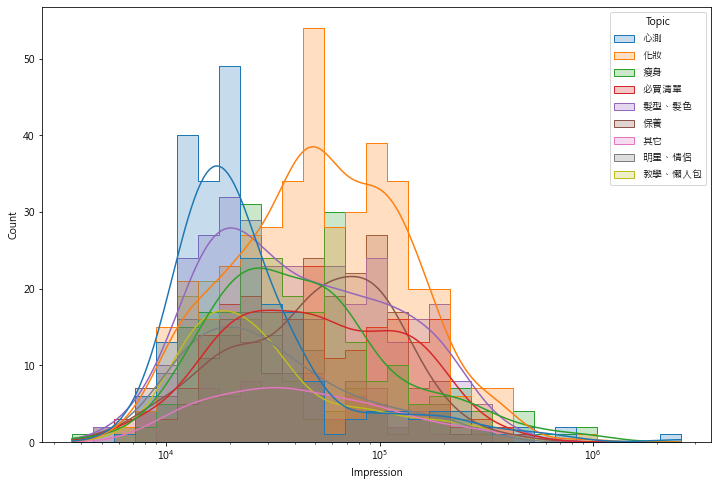

In [240]:
f, ax = plt.subplots(figsize=(12,8))
x = result
ax = sns.histplot(data=result, x="Impression",kde=True, hue = 'Topic',log_scale=True,multiple="layer",element="step")
plt.show()

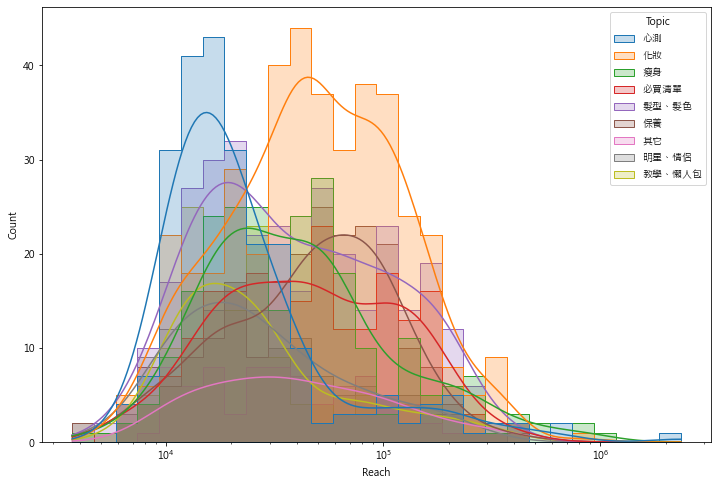

In [237]:
f, ax = plt.subplots(figsize=(12,8))
x = result
ax = sns.histplot(data=result, x="Reach",kde=True, hue = 'Topic',log_scale=True,multiple="layer",element="step")
plt.show()

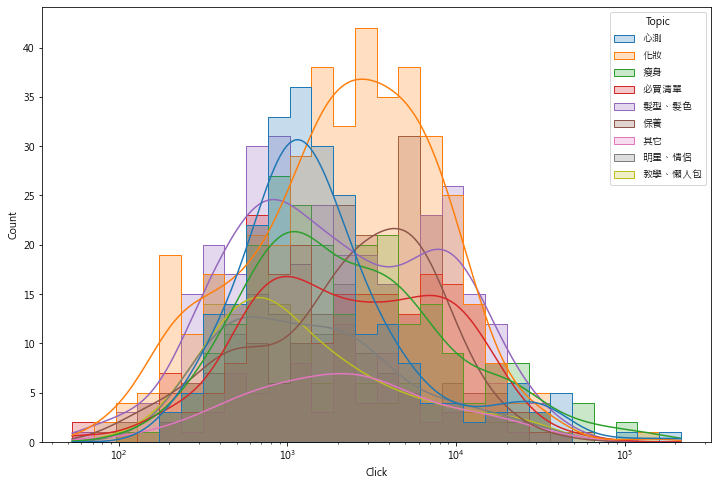

In [238]:
f, ax = plt.subplots(figsize=(12,8))
x = result
ax = sns.histplot(data=result, x="Click",kde=True, hue = 'Topic',log_scale=True,multiple="layer",element="step")
plt.show()

In [219]:
penguins = sns.load_dataset("penguins")

In [227]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

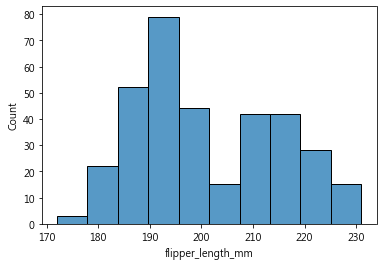

In [226]:
sns.histplot(data=penguins, x="flipper_length_mm")

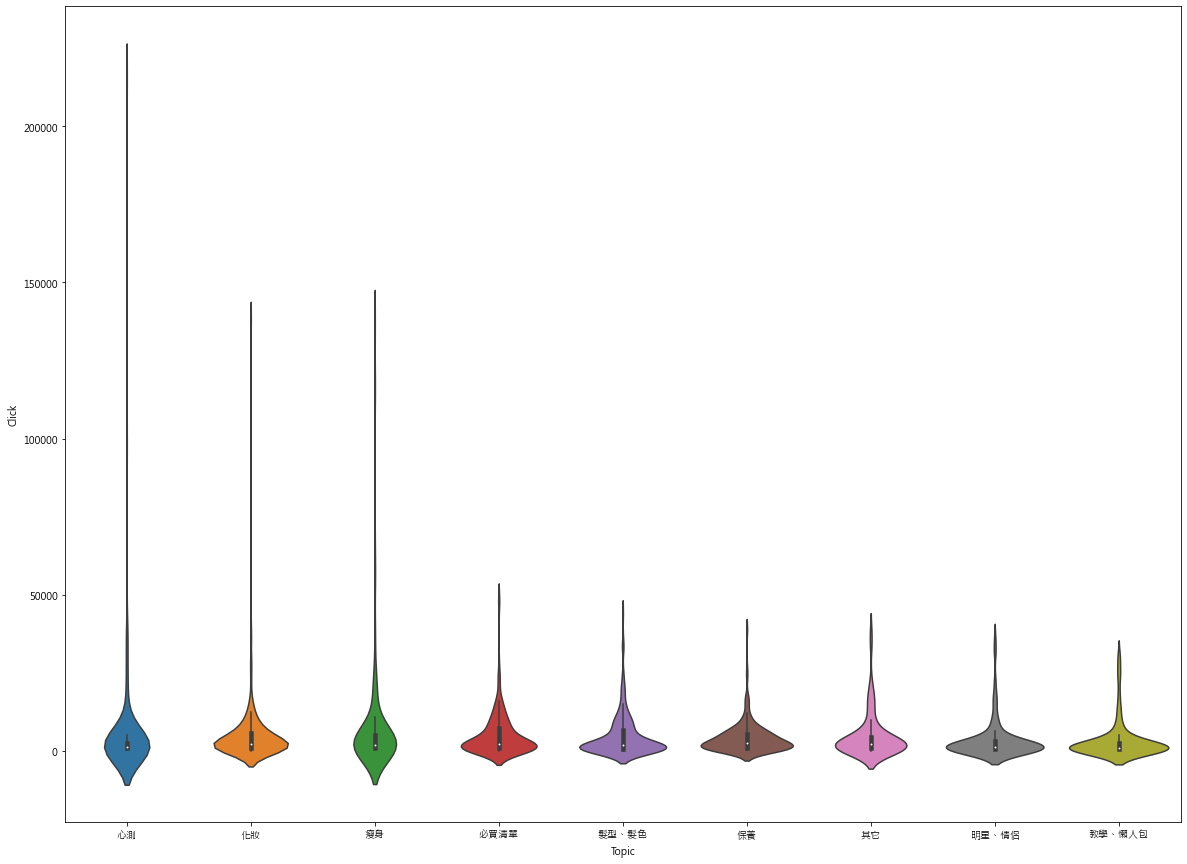

In [253]:
f, ax = plt.subplots(figsize=(20, 15))
sns.violinplot(x="Topic", y="Click", data=result)
plt.show()